In [31]:
!pip3 install opencv-python

Script file 'D:\anaconda3\Scripts\pip3-script.py' is not present.


In [33]:
!python3 get-pip3.py

Python


In [36]:
!apt-get install python3-pip

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import scipy as sp

In [3]:
# 흑백 , 그레이스케일 -> 수치가 높을수록 밝음
img_gray = sp.misc.face(gray=True)
img_gray.shape

AttributeError: module 'scipy' has no attribute 'misc'

In [4]:
from sklearn.datasets import load_sample_images

dataset = load_sample_images()

In [5]:
img_rgb = dataset.images[1]
img_rgb.shape

(427, 640, 3)

### pillow를 이용한 이미지 처리

In [6]:
import PIL
PIL.__version__

'7.2.0'

In [7]:
!wget -O logo.png https://www.python.org/static/community_logos/python-logo-master-v3-TM.png

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
img_logo_png = Image.open("./logo.png")
img_logo_png.size

(601, 203)

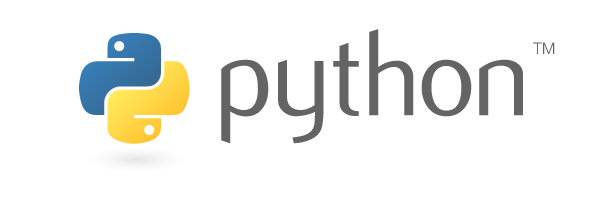

In [9]:
img_logo_png

In [10]:
img_logo_png.save("./logo.bmp")

In [11]:
img_logo_bmp = Image.open("./logo.bmp")

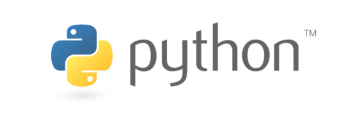

In [12]:
# 이미지 데이터 처리를 위해서 이미지 클래스 객체를 어레이로 전환해야함.

img_logo_array = np.array(img_logo_bmp)
plt.imshow(img_logo_array)
plt.axis("off")
plt.show()

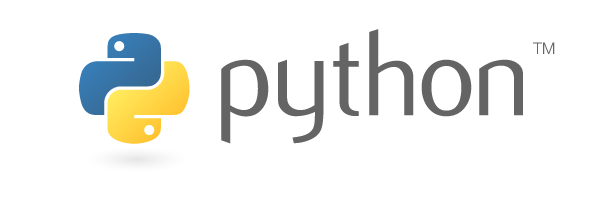

In [13]:
# 어레이 형태를 이미지로 전환하기
Image.fromarray(img_logo_array)

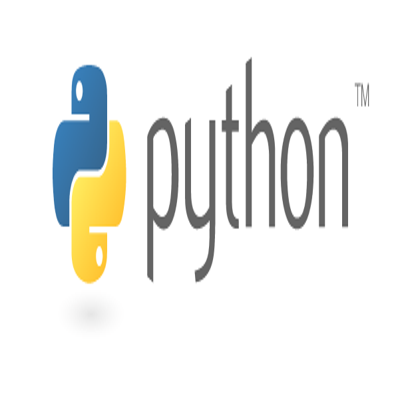

In [14]:
# 이미 크기변환 
img_logo_bmp.resize((400,400))

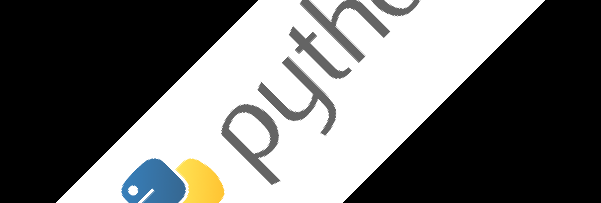

In [15]:
# 이미지 회전
img_logo_bmp.rotate(45)

In [16]:
import skimage.data
img_astro = skimage.data.astronaut()
img_astro.shape

(512, 512, 3)

In [17]:
skimage.io.imsave("astronaut.png", img_astro)
img_astro2 = skimage.io.imread("astronaut.png")

### openCV  이용

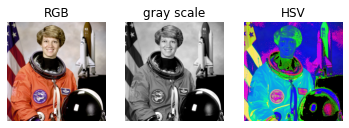

In [18]:
from skimage import color

plt.subplot(131)
plt.imshow(img_astro)
plt.axis("off")
plt.title("RGB")

plt.subplot(132)
plt.imshow(color.rgb2gray(img_astro), cmap=plt.cm.gray)
plt.axis("off")
plt.title("gray scale")

plt.subplot(133)
plt.imshow(color.rgb2hsv(img_astro))
plt.axis("off")
plt.title("HSV")

plt.show()

In [20]:
!pip3 install numpy

Script file 'D:\anaconda3\Scripts\pip3-script.py' is not present.


In [ ]:
!conda install opencv 

In [19]:
import cv2
cv2.__version__

ModuleNotFoundError: No module named 'cv2'

In [42]:
img_astro3 = cv2.imread("./astronaut.png")
img_astro3.shape

(512, 512, 3)

In [43]:
# rgb 가 아닌 bgr 순서로 저장되어있기 때문에 반전시켜야함

b, g, r = cv2.split(img_astro3)

img_astro3_rgb = cv2.merge([r,g,b])

In [46]:
img_astro3_gray = cv2.cvtColor(img_astro3, cv2.COLOR_BGR2GRAY)

In [47]:
cv2.imwrite("./gray_astronaut.png", img_astro3_gray)

True

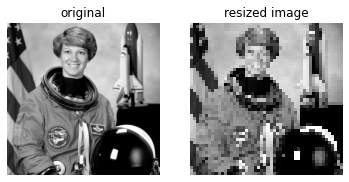

In [49]:
img_astro3_gray_resized = cv2.resize(img_astro3_gray, dsize=(50, 50))
img_astro3_gray_resized.shape

plt.subplot(121)
plt.imshow(img_astro3_gray, cmap=plt.cm.gray)
plt.title("original")
plt.axis("off")

plt.subplot(122)
plt.imshow(img_astro3_gray_resized, cmap=plt.cm.gray)
plt.title("resized image")
plt.axis("off")

plt.show()

### 이미지 필터링
- 이미지의 색상을 바꾸기
- 경계선 추출에 사용함

In [50]:
# 임계처리 
# 이진화 시키기 

- threshold(src, thresh, maxval, type)
- type : 임계처리 유형
    - THRESH_BINARY
    - THRESH_BINARY_INV
    - THRESH_TRUNC
    - THRESH_TOZERO
    - THRESH_TOZERO_INV

In [30]:
import cv2
from skimage.data import coins

img = coins()

maxval = 255
thresh = maxval / 2
# 원본이미지가 나오는건 _로 버려버림 
_, thresh1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO_INV)

titles = ['Original', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(9, 5))
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontdict={'fontsize': 10})
    plt.axis('off')

plt.tight_layout(pad=0.7)
plt.show()

ModuleNotFoundError: No module named 'cv2'

### 적응임계처리

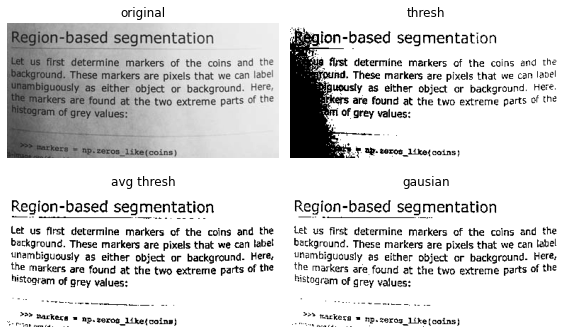

In [55]:
from skimage.data import page

img = page()

maxval = 255
thresh = 126
ret, th1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)

k = 15
C = 20

th2 = cv2.adaptiveThreshold(
    img, maxval, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, k, C)
th3 = cv2.adaptiveThreshold(
    img, maxval, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, k, C)

images = [img, th1, th2, th3]
titles = ['original', 'thresh', 'avg thresh', 'gausian']

plt.figure(figsize=(8, 5))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

### filter 2D 이미지 뭉개기
- filter2D(src, ddepth, kernel[ , dst[,anchor[, delta[, borderType]]]]])
    - src : image
    - ddepth : image depth, -1이면 입력과 동일
    - kernel : 커널 행렬

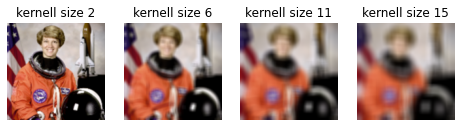

In [59]:
import cv2
from skimage.data import astronaut

img = astronaut()
img = cv2.resize(img, dsize=(150, 150))

plt.figure(figsize=(8, 3))
for i, k in enumerate([2, 6, 11, 15]):
    kernel = np.ones((k, k)) / k**2
    filtering = cv2.filter2D(img, -1, kernel)
    plt.subplot(1, 4, i + 1)
    plt.imshow(filtering)
    plt.title("kernell size {}".format(k))
    plt.axis("off")

plt.show()

### 블러
- 평균 블러
- 중앙값 블러 : 점노이즈 제거 쉬움
- 가우시안 블러 : 전체적으로 제거 , 백색 노이즈 제거 가능
- 양방향 블러 : 경계선을 살리며 블러

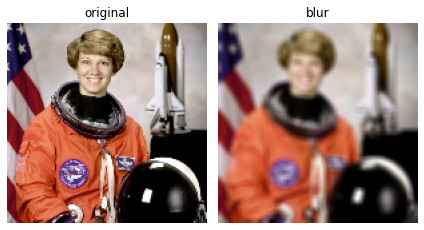

In [60]:
# 평균 블러
blur = cv2.blur(img, (5, 5))
boxfilter = cv2.boxFilter(img, -1, (5, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("original")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(blur)
plt.title("blur")
plt.axis('off')

plt.tight_layout()
plt.show()

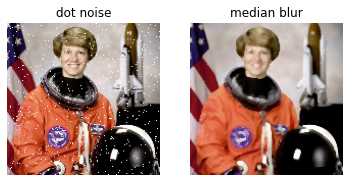

In [62]:
# 중앙값 블러
# 점 잡음 적용
img_noise = img.copy()

np.random.seed(0)
N = 500
idx1 = np.random.randint(img.shape[0], size=N)
idx2 = np.random.randint(img.shape[1], size=N)
img_noise[idx1, idx2] = 255

# 중앙값 블러로 잡음 제거
img_denoise = cv2.medianBlur(img_noise, 3)

plt.subplot(1, 2, 1)
plt.imshow(img_noise)
plt.title("dot noise")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_denoise)
plt.title("median blur")
plt.axis('off')
plt.show()

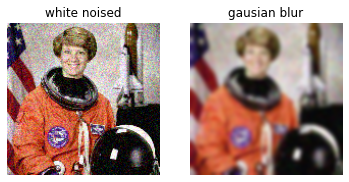

In [63]:
# 가우시안 블러
# 백색 잡음
img_noise = np.clip((img / 255 + np.random.normal(scale=0.1, size=img.shape)) * 255, 0, 255).astype('uint8')

# 가우시안 블러로 잡음 제거
img_denoise = cv2.GaussianBlur(img_noise, (9, 9), 2)

plt.subplot(1, 2, 1)
plt.imshow(img_noise)
plt.title("white noised")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_denoise)
plt.title("gausian blur")
plt.axis('off')

plt.show()

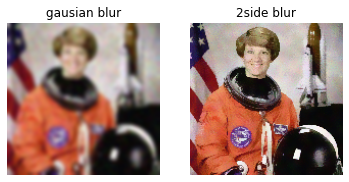

In [64]:
# 양방향 필터링으로 경계선 살리기
img_denoise1 = cv2.GaussianBlur(img_noise, (9, 9), 2)
img_denoise2 = cv2.bilateralFilter(img_noise, 9, 75, 75)

plt.subplot(1, 2, 1)
plt.imshow(img_denoise1)
plt.title("gausian blur")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_denoise2)
plt.title("2side blur")
plt.axis('off')

plt.show()

### 침식기법
- 최솟값으로 대체

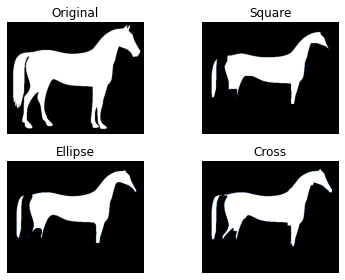

In [67]:
from skimage.data import horse

img = horse().astype('uint8')
img = np.ones(img.shape) - img

ksize = (20, 20)
kernel = {}
kernel[0] = cv2.getStructuringElement(cv2.MORPH_RECT, ksize)
kernel[1] = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize)
kernel[2] = cv2.getStructuringElement(cv2.MORPH_CROSS, ksize)
title = ["Square", "Ellipse", "Cross"]

plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.axis('off')
for i in range(3):
    erosion = cv2.erode(img, kernel[i])
    plt.subplot(2, 2, i+2)
    plt.imshow(erosion, cmap='bone')
    plt.title(title[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

### 팽창 
- 최대값으로 대체

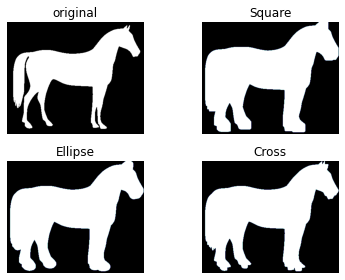

In [68]:
plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("original")
plt.axis('off')
for i in range(3):
    erosion = cv2.dilate(img, kernel[i])
    plt.subplot(2, 2, i+2)
    plt.imshow(erosion, cmap='bone')
    plt.title(title[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

### 그래디언트 , 오프닝, 클로징
- 그래디언트 :
- 오프닝 : 침-> 팽 잡음제거
- 클로징 : 팽-> 침 윤곽파악

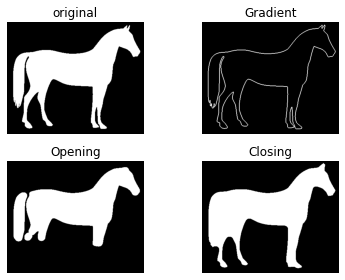

In [71]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
)

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
)

gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
)

images = [img, gradient, opening, closing]
titles = ["original", 'Gradient', 'Opening', 'Closing']

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

### 연습문제

In [2]:
import cv2

# 이미지 불러오기
img = cv2.imread("./receipt.png")

# 이미지 그레이톤으로 변환
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
maxval = 255
thresh = 200

# 2진 변환 적용 (threshold)
_, img_bin = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)

# 클로징
img_closing = cv2.morphologyEx(img_bin, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 30)))

# 중앙값 블러처리
img_blur = cv2.medianBlur(img_closing, 3)

plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.imshow(img, cmap = plt.cm.gray)
plt.subplot(1,4,2)
plt.imshow(img_bin, cmap = plt.cm.gray)
plt.subplot(1,4,3)
plt.imshow(img_closing, cmap = plt.cm.gray)
plt.subplot(1,4,4)
plt.imshow(img_blur, cmap = plt.cm.gray)
plt.grid(False)
plt.show()

ModuleNotFoundError: No module named 'cv2'

### 컨투어
- 동일한 색 또는 동일한 강도를 가지고 있는 영역의 경계선 정보

In [1]:
import cv2
from skimage.data import horse

img_raw = horse().astypepe('uint8')

ModuleNotFoundError: No module named 'cv2'